In [91]:
import numpy as np
import matplotlib.pyplot as plt

1. Необходимо аппроксимировать функцию на интервале [-5; 5]

In [3]:
# исходная функция, которую нужно аппроксимировать моделью a(x)
def func(x):
    return 0.1 * x**2 - np.sin(x) + 5.


def grad(x, w):
    gradient = 2 / sz * x.T @ (x @ w.T - y)
    return gradient


coord_x = np.arange(-5.0, 5.0, 0.1) # значения по оси абсцисс [-5; 5] с шагом 0.1
coord_y = func(coord_x) # значения функции по оси ординат
y = coord_y

sz = len(coord_x)
eta = np.array([0.1, 0.01, 0.001, 0.0001]) # шаг обучения для каждого параметра w0, w1, w2, w3
w = np.array([0., 0., 0., 0.]) # начальные значения параметров модели
N = 200 # число итераций градиентного алгоритма


x = np.array([[1, x, x**2, x**3] for x in coord_x])

for i in range(N):
    w = w - eta*grad(x, w)

Q = np.sum((x@w - y)**2)/sz

Решение:

Найдем вектор параметров с помощью градиентного алгоритма: 
### $w_{n} = w_{n-1} - \eta * \frac{\partial Q(w)}{\partial w}$

При квадратической функции потерь, берем такой функционал качества: 
### $Q(w) = \frac{1}{n} * \sum^n_{i=1}(a(x_{i}) - f(x_{i}))^2$,

тогда его частная производная по вектору параметров w равна:
### $\frac{\partial Q(w)}{\partial w} =  \frac{2}{n} * \sum^n_{i=1}(w^T * x_{i} - f(x_{i})) * x_{i}$

2. Аппроксимировать функцию с помощью стохастического градиентного спуска.

In [99]:
# исходная функция, которую нужно аппроксимировать моделью a(x)
def func(x):
    return 0.5 * x + 0.2 * x ** 2 - 0.05 * x ** 3 + 0.2 * np.sin(4 * x) - 2.5


def grad(xk, w, idx):
    return (2/batch_size) * xk.T @ (xk @ w.T - coord_y[idx])


def Q(x, w, y, n):
    return np.sum((x@w.T - y)**2)/n


coord_x = np.arange(-4.0, 6.0, 0.1) # значения по оси абсцисс [-5; 5] с шагом 0.1
coord_y = func(coord_x) # значения функции по оси ординат

sz = len(coord_x)
eta = np.array([0.1, 0.01, 0.001, 0.0001]) # шаг обучения для каждого параметра w0, w1, w2, w3
w = np.array([0., 0., 0., 0.]) # начальные значения параметров модели
N = 500 # число итераций алгоритма SGD
lm = 0.02 # значение параметра лямбда для вычисления скользящего экспоненциального среднего
batch_size = 50 # размер мини-батча


x = np.array([[1, x, x**2, x**3] for x in coord_x])

Qe = Q(x, w, coord_y, sz)
np.random.seed(0)

Qe_lst = [Qe]
Q_lst = [Qe]

for _ in range(N):
    idx = np.random.choice(sz, batch_size, False)
    
    xk = x[idx]
    yk = coord_y[idx]
    
    w = w - eta*grad(xk, w, idx)
    
    Qk = Q(xk, w, yk, batch_size)
    Qe = lm * Qk + (1-lm)*Qe
    
    Qe_lst.append(Qe)
    Q_lst.append(Q(x, w, coord_y, sz))


Q = Q(x, w, coord_y, sz)

При стохастическом градиентном спуске, в отличие от классического, псевдоградиент может рассчитываться либо по одному образу из выборки, при каждой итерации алгоритма, либо в диапозоне по K образов.

Для решения данной задачи выбран алгоритм стохастического градиентого спуска с псевдоградиентом в диапозоне [k: k+K).

Визуализация аппроксимации функции и изменения значений Qe - экспоненциального скользящего среднего и Q - итоговое значение среднего эмпирического риска для обученной модели.

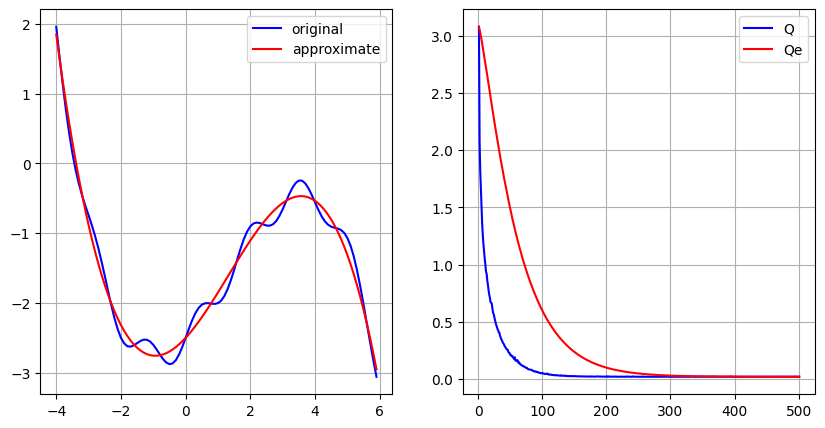

In [100]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].grid()
ax[1].grid()

ax[0].plot(coord_x, coord_y, label='original', c='blue')
ax[0].plot(coord_x, [xx@w for xx in x], label='approximate', c='red')

ax[1].plot(range(1, 502), Q_lst, label='Q', c='blue')
ax[1].plot(range(1, 502), Qe_lst, label='Qe', c='red')

ax[0].legend()
ax[1].legend()
plt.show()

3. Задача бинарной классификации с помощью алгоритма SGD.

In [105]:
# экспоненциальная функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y
    return np.exp(-M)


# производная экспоненциальной функции потерь по вектору w
def df(w, x, y):
    M = np.dot(w, x.T) * y
    return -np.exp(-M) * x.T * y


data_x = [(5.8, 1.2), (5.6, 1.5), (6.5, 1.5), (6.1, 1.3), (6.4, 1.3), (7.7, 2.0), (6.0, 1.8), (5.6, 1.3), (6.0, 1.6), (5.8, 1.9), (5.7, 2.0), (6.3, 1.5), (6.2, 1.8), (7.7, 2.3), (5.8, 1.2), (6.3, 1.8), (6.0, 1.0), (6.2, 1.3), (5.7, 1.3), (6.3, 1.9), (6.7, 2.5), (5.5, 1.2), (4.9, 1.0), (6.1, 1.4), (6.0, 1.6), (7.2, 2.5), (7.3, 1.8), (6.6, 1.4), (5.6, 2.0), (5.5, 1.0), (6.4, 2.2), (5.6, 1.3), (6.6, 1.3), (6.9, 2.1), (6.8, 2.1), (5.7, 1.3), (7.0, 1.4), (6.1, 1.4), (6.1, 1.8), (6.7, 1.7), (6.0, 1.5), (6.5, 1.8), (6.4, 1.5), (6.9, 1.5), (5.6, 1.3), (6.7, 1.4), (5.8, 1.9), (6.3, 1.3), (6.7, 2.1), (6.2, 2.3), (6.3, 2.4), (6.7, 1.8), (6.4, 2.3), (6.2, 1.5), (6.1, 1.4), (7.1, 2.1), (5.7, 1.0), (6.8, 1.4), (6.8, 2.3), (5.1, 1.1), (4.9, 1.7), (5.9, 1.8), (7.4, 1.9), (6.5, 2.0), (6.7, 1.5), (6.5, 2.0), (5.8, 1.0), (6.4, 2.1), (7.6, 2.1), (5.8, 2.4), (7.7, 2.2), (6.3, 1.5), (5.0, 1.0), (6.3, 1.6), (7.7, 2.3), (6.4, 1.9), (6.5, 2.2), (5.7, 1.2), (6.9, 2.3), (5.7, 1.3), (6.1, 1.2), (5.4, 1.5), (5.2, 1.4), (6.7, 2.3), (7.9, 2.0), (5.6, 1.1), (7.2, 1.8), (5.5, 1.3), (7.2, 1.6), (6.3, 2.5), (6.3, 1.8), (6.7, 2.4), (5.0, 1.0), (6.4, 1.8), (6.9, 2.3), (5.5, 1.3), (5.5, 1.1), (5.9, 1.5), (6.0, 1.5), (5.9, 1.8)]
data_y = [-1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1]

x_train = np.array([[1, x[0], x[1]] for x in data_x])
y_train = np.array(data_y)

n_train = len(x_train)
w = np.array([0.0, 0.0, 0.0])  # начальные весовые коэффициенты
nt = np.array([0.5, 0.01, 0.01])  # шаг обучения для каждого параметра w0, w1, w2
lm = 0.01  # значение параметра лямбда для вычисления скользящего экспоненциального среднего
N = 500  # число итераций алгоритма SGD
batch_size = 10 # размер мини-батча

Qe = np.mean([loss(w, x, y) for x, y in zip(x_train, y_train)])
np.random.seed(0)

Qe_lst = [Qe]
Q_lst = [Qe]

for _ in range(N):
    k = np.random.randint(0, n_train-batch_size-1)
    xk = x_train[k:k+batch_size]
    yk = y_train[k:k+batch_size]
    
    Qk = np.sum([loss(w, x.T, y) for x, y in zip(xk, yk)])/batch_size
    w = w - nt * df(w, xk, yk).mean(1)
    Qe = lm * Qk + (1 - lm) * Qe
    
    Qe_lst.append(Qe)
    
    M = np.array([w.T @ x for x in x_train])
    Q_lst.append(np.sum(np.array([(M * y_train) < 0])) / n_train)
    
M = np.array([w.T @ x for x in x_train])
Q = np.sum(np.array([(M * y_train) < 0])) / n_train

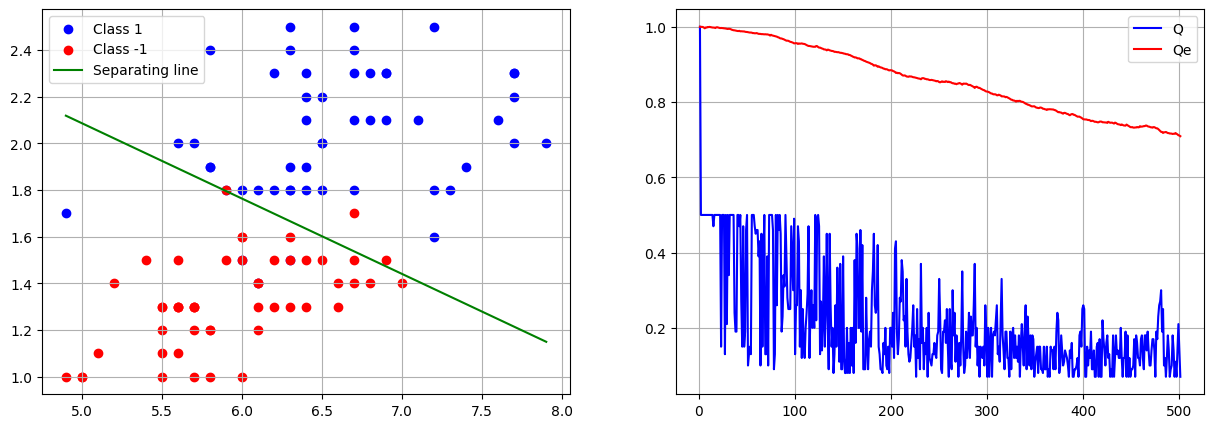

In [107]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].grid()
ax[1].grid()

x_0 = x_train[y_train == 1][:, 1:]
x_1 = x_train[y_train == -1][:, 1:]

x_min, x_max = np.min(x_train[:, 1]), np.max(x_train[:, 1])
x_range = np.linspace(x_min, x_max, 100)
y_range = -x_range * w[1] / w[2] - w[0] / w[2]

ax[0].scatter(x_0[:, 0], x_0[:, 1], color='blue', label='Class 1')
ax[0].scatter(x_1[:, 0], x_1[:, 1], color='red', label='Class -1')
ax[0].plot(x_range, y_range, color='green', label='Separating line')

ax[1].plot(range(1, 502), Q_lst, label='Q', c='blue')
ax[1].plot(range(1, 502), Qe_lst, label='Qe', c='red')

ax[0].legend()
ax[1].legend()
plt.show()

4. Аппроксимировать функцию с помощью алгоритма SGD с оптимизатором импульсов Нестерова.

In [101]:
# исходная функция, которую нужно аппроксимировать
def func(x):
    return -0.7 * x - 0.2 * x ** 2 + 0.05 * x ** 3 - 0.2 * np.cos(3 * x) + 2


def df(w, v, x, y):
    return (2/batch_size) * x.T @ (x @ w.T - y)
    
    
def loss(x, y, w, sz):
    return np.sum((x @ w.T - y)**2)/sz


coord_x = np.arange(-4.0, 6.0, 0.1) # значения по оси абсцисс [-4; 6] с шагом 0.1
coord_y = func(coord_x) # значения функции по оси ординат

sz = len(coord_x)
eta = np.array([0.1, 0.01, 0.001, 0.0001]) # шаг обучения для каждого параметра w0, w1, w2, w3
w = np.array([0., 0., 0., 0.]) # начальные значения параметров модели
N = 500 # число итераций алгоритма SGD
lm = 0.02 # значение параметра лямбда для вычисления скользящего экспоненциального среднего
batch_size = 20 # размер мини-батча

gamma = 0.8 # коэффициент гамма для вычисления импульсов Нестерова
v = np.zeros(len(w))  # начальное значение [0, 0, 0, 0]

x = np.array([[1, x, x**2, x**3] for x in coord_x])

Qe = loss(x, coord_y, w, sz) # начальное значение среднего эмпирического риска
np.random.seed(0)

Qe_lst = [Qe]
Q_lst = [Qe]

for _ in range(N):
    k = np.random.randint(0, sz - batch_size - 1)
    xk = x[range(k, k+batch_size)]
    yk = coord_y[range(k, k+batch_size)]
    
    Qk = loss(xk, yk, w, batch_size)
    Qe = lm * Qk + (1 - lm) * Qe

    v = gamma * v + (1 - gamma) * eta * df(w - gamma*v, v, xk, yk)
    w = w - v
    
    Qe_lst.append(Qe)
    Q_lst.append(loss(x, coord_y, w, sz))

Q = loss(x, coord_y, w, sz)

Импульс Нестерова: 
### $\upsilon = \gamma * \upsilon + (1 - \gamma) * \eta * \frac{\partial Qk(w - \gamma * \upsilon)}{\partial w}$
### $w_{n} = w_{n-1} - \upsilon$

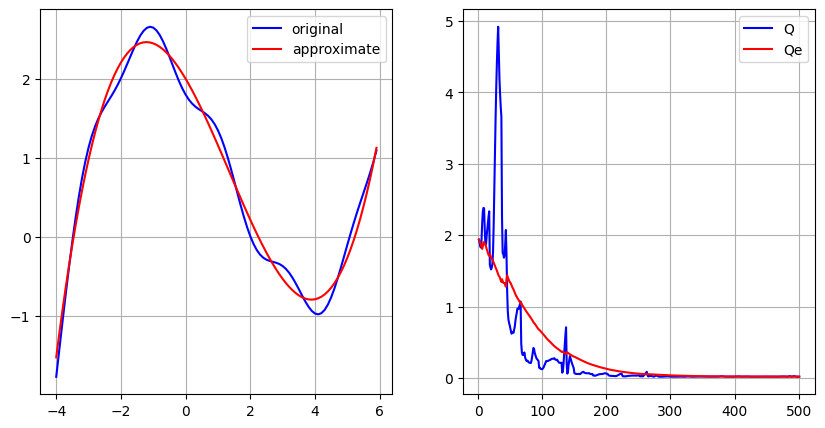

In [102]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].grid()
ax[1].grid()

ax[0].plot(coord_x, coord_y, label='original', c='blue')
ax[0].plot(coord_x, [xx@w for xx in x], label='approximate', c='red')

ax[1].plot(range(1, 502), Q_lst, label='Q', c='blue')
ax[1].plot(range(1, 502), Qe_lst, label='Qe', c='red')

ax[0].legend()
ax[1].legend()
plt.show()

5. Решить задачу бинарной классификации с помощью алгоритма SGD с оптимизатором RMSProp.

In [108]:
# логарифмическая функция потерь
def loss(w, x, y):
    M = np.dot(w, x.T) * y
    return np.log2(1 + np.exp(-M))


# производная логарифмической функции потерь по вектору w
def df(w, x, y):
    M = np.dot(w, x.T) * y
    return -(np.exp(-M) * x.T * y) / ((1 + np.exp(-M)) * np.log(2))


data_x = [(5.3, 2.3), (5.7, 2.5), (4.0, 1.0), (5.6, 2.4), (4.5, 1.5), (5.4, 2.3), (4.8, 1.8), (4.5, 1.5), (5.1, 1.5), (6.1, 2.3), (5.1, 1.9), (4.0, 1.2), (5.2, 2.0), (3.9, 1.4), (4.2, 1.2), (4.7, 1.5), (4.8, 1.8), (3.6, 1.3), (4.6, 1.4), (4.5, 1.7), (3.0, 1.1), (4.3, 1.3), (4.5, 1.3), (5.5, 2.1), (3.5, 1.0), (5.6, 2.2), (4.2, 1.5), (5.8, 1.8), (5.5, 1.8), (5.7, 2.3), (6.4, 2.0), (5.0, 1.7), (6.7, 2.0), (4.0, 1.3), (4.4, 1.4), (4.5, 1.5), (5.6, 2.4), (5.8, 1.6), (4.6, 1.3), (4.1, 1.3), (5.1, 2.3), (5.2, 2.3), (5.6, 1.4), (5.1, 1.8), (4.9, 1.5), (6.7, 2.2), (4.4, 1.3), (3.9, 1.1), (6.3, 1.8), (6.0, 1.8), (4.5, 1.6), (6.6, 2.1), (4.1, 1.3), (4.5, 1.5), (6.1, 2.5), (4.1, 1.0), (4.4, 1.2), (5.4, 2.1), (5.0, 1.5), (5.0, 2.0), (4.9, 1.5), (5.9, 2.1), (4.3, 1.3), (4.0, 1.3), (4.9, 2.0), (4.9, 1.8), (4.0, 1.3), (5.5, 1.8), (3.7, 1.0), (6.9, 2.3), (5.7, 2.1), (5.3, 1.9), (4.4, 1.4), (5.6, 1.8), (3.3, 1.0), (4.8, 1.8), (6.0, 2.5), (5.9, 2.3), (4.9, 1.8), (3.3, 1.0), (3.9, 1.2), (5.6, 2.1), (5.8, 2.2), (3.8, 1.1), (3.5, 1.0), (4.5, 1.5), (5.1, 1.9), (4.7, 1.4), (5.1, 1.6), (5.1, 2.0), (4.8, 1.4), (5.0, 1.9), (5.1, 2.4), (4.6, 1.5), (6.1, 1.9), (4.7, 1.6), (4.7, 1.4), (4.7, 1.2), (4.2, 1.3), (4.2, 1.3)]
data_y = [1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, -1, -1, -1]

x_train = np.array([[1, x[0], x[1]] for x in data_x])
y_train = np.array(data_y)

n_train = len(x_train)
w = [0.0, 0.0, 0.0]  # начальные весовые коэффициенты
nt = np.array([0.1, 0.05, 0.05])  # шаг обучения для каждого параметра w0, w1, w2
lm = 0.01  # значение параметра лямбда для вычисления скользящего экспоненциального среднего
N = 200  # число итераций алгоритма SGD
batch_size = 10 # размер мини-батча

# параметры для RMSProp
alpha = 0.7
G = np.zeros(len(w))
eps = 0.01

Qe = np.sum(loss(w, x_train, y_train))/n_train # начальное значение среднего эмпирического риска
np.random.seed(0)

Qe_lst = [Qe]
Q_lst = [Qe]

for _ in range(N):
    k = np.random.randint(0, n_train - batch_size - 1)
    xk = x_train[range(k, k+batch_size)]
    yk = y_train[range(k, k+batch_size)]
    
    Qk = np.sum(loss(w, xk, yk))/batch_size
    Qe = lm * Qk + (1 - lm) * Qe
    
    G = alpha * G + (1 - alpha) * (np.sum(df(w, xk, yk), axis=1)/batch_size) * (np.sum(df(w, xk, yk), axis=1)/batch_size)
    w = w - nt * (np.sum(df(w, xk, yk), axis=1)/batch_size) / (np.sqrt(G) + eps)
    
    Qe_lst.append(Qe)
    Q_lst.append(np.sum([(x_train @ w.T * y_train) < 0])/n_train)
    
Q = np.sum([(x_train @ w.T * y_train) < 0])/n_train

Оптимизатор RMSProp:
### $G = \alpha * G + (1 - \alpha) * \frac{\partial Qk(w)}{\partial w} * \frac{\partial Qk(w)}{\partial w}$

### $w_{n} = w_{n-1} - \eta * \frac{\partial Qk(w) / \partial w}{\sqrt{G} + \epsilon}$

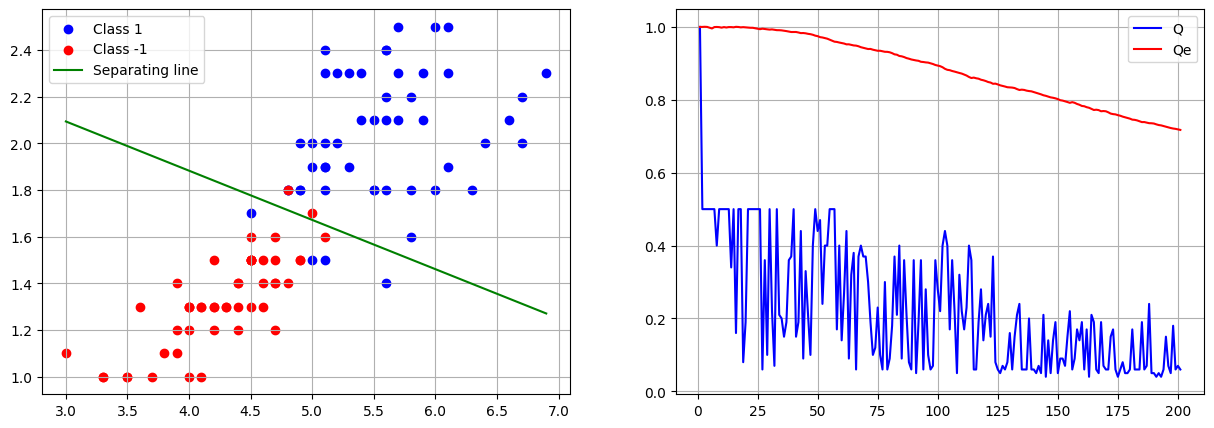

In [110]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].grid()
ax[1].grid()

x_0 = x_train[y_train == 1][:, 1:]
x_1 = x_train[y_train == -1][:, 1:]

x_min, x_max = np.min(x_train[:, 1]), np.max(x_train[:, 1])
x_range = np.linspace(x_min, x_max, 100)
y_range = -x_range * w[1] / w[2] - w[0] / w[2]

ax[0].scatter(x_0[:, 0], x_0[:, 1], color='blue', label='Class 1')
ax[0].scatter(x_1[:, 0], x_1[:, 1], color='red', label='Class -1')
ax[0].plot(x_range, y_range, color='green', label='Separating line')

ax[1].plot(range(1, 202), Q_lst, label='Q', c='blue')
ax[1].plot(range(1, 202), Qe_lst, label='Qe', c='red')

ax[0].legend()
ax[1].legend()
plt.show()

6. Аппроксимация функции с использованием L2 - регуляризатора.

In [117]:
# исходная функция, которую нужно аппроксимировать моделью a(x)
def func(x):
    return 0.5 * x + 0.2 * x ** 2 - 0.05 * x ** 3 + 0.2 * np.sin(4 * x) - 2.5


# модель
def model(w, x):
    xv = np.array([x ** n for n in range(len(w))])
    return w.T @ xv


# функция потерь
def loss(w, x, y):
    return (model(w, x) - y) ** 2


# производная функции потерь
def dL(w, x, y):
    xv = np.array([x ** n for n in range(len(w))])
    return 2 * (model(w, x) - y) * xv


coord_x = np.arange(-4.0, 6.0, 0.1) # значения по оси абсцисс [-4; 6] с шагом 0.1
coord_y = func(coord_x) # значения функции по оси ординат

N = 5 # сложность модели (полином степени N-1)
lm_l2 = 2 # коэффициент лямбда для L2-регуляризатора
sz = len(coord_x)
eta = np.array([0.1, 0.01, 0.001, 0.0001, 0.000002]) # шаг обучения для каждого параметра w0, w1, w2, w3, w4
w = np.zeros(N) # начальные нулевые значения параметров модели
n_iter = 500 # число итераций алгоритма SGD
lm = 0.02 # значение параметра лямбда для вычисления скользящего экспоненциального среднего
batch_size = 20 # размер мини-батча

Qe = loss(w, coord_x, coord_y).mean()
np.random.seed(0)

Qe_lst = [Qe]
Q_lst = [Qe]

for _ in range(n_iter):
    k = np.random.randint(0, sz-batch_size-1)
    xk = coord_x[k:k+batch_size]
    yk = coord_y[k:k+batch_size]
    
    Qk = loss(w, xk, yk).mean()
    Qe = lm*Qk + (1 - lm)*Qe
    
    w_ = np.array([0, *w[1:]])
    w = w - eta * (dL(w, xk, yk).mean(1) + lm_l2*w_)
    
    Qe_lst.append(Qe)
    Q_lst.append(loss(w, coord_x, coord_y).mean())
    
Q = loss(w, coord_x, coord_y).mean()

L2 - регуляризатор:
### $w_{n} = w_{n-1} - \eta * \frac{\partial Qk(w)}{\partial w} + \lambda * \tilde{w}$,
где $\tilde{w}$ - вектор с исключенным первым параметром $w_{0}$.

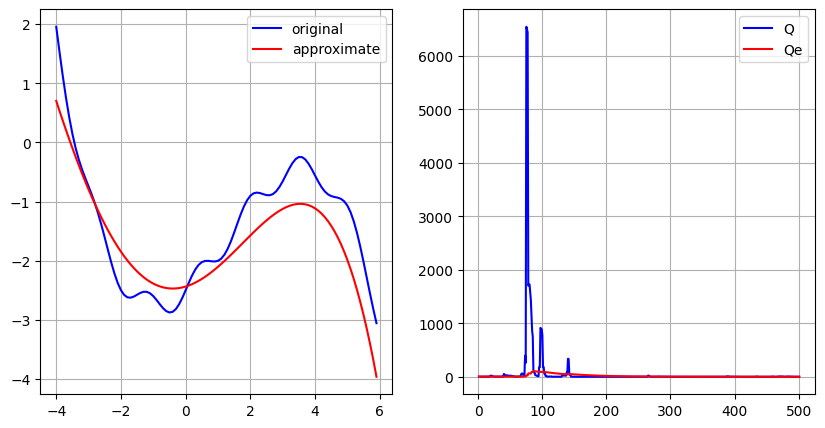

In [118]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].grid()
ax[1].grid()

ax[0].plot(coord_x, coord_y, label='original', c='blue')
ax[0].plot(coord_x, [model(w, x) for x in coord_x], label='approximate', c='red')

ax[1].plot(range(1, 502), Q_lst, label='Q', c='blue')
ax[1].plot(range(1, 502), Qe_lst, label='Qe', c='red')

ax[0].legend()
ax[1].legend()
plt.show()

7. Бинарная классификация с использованием L1 - регуляризатора.

In [119]:
# логарифмическая функция потерь
def loss(w, x, y):
    M = np.dot(w, x.T) * y
    return np.log2(1 + np.exp(-M))


# производная логарифмической функции потерь по вектору w
def df(w, x, y):
    M = np.dot(w, x.T) * y
    return -(np.exp(-M) * x.T * y) / ((1 + np.exp(-M)) * np.log(2))


data_x = [(5.8, 1.2), (5.6, 1.5), (6.5, 1.5), (6.1, 1.3), (6.4, 1.3), (7.7, 2.0), (6.0, 1.8), (5.6, 1.3), (6.0, 1.6), (5.8, 1.9), (5.7, 2.0), (6.3, 1.5), (6.2, 1.8), (7.7, 2.3), (5.8, 1.2), (6.3, 1.8), (6.0, 1.0), (6.2, 1.3), (5.7, 1.3), (6.3, 1.9), (6.7, 2.5), (5.5, 1.2), (4.9, 1.0), (6.1, 1.4), (6.0, 1.6), (7.2, 2.5), (7.3, 1.8), (6.6, 1.4), (5.6, 2.0), (5.5, 1.0), (6.4, 2.2), (5.6, 1.3), (6.6, 1.3), (6.9, 2.1), (6.8, 2.1), (5.7, 1.3), (7.0, 1.4), (6.1, 1.4), (6.1, 1.8), (6.7, 1.7), (6.0, 1.5), (6.5, 1.8), (6.4, 1.5), (6.9, 1.5), (5.6, 1.3), (6.7, 1.4), (5.8, 1.9), (6.3, 1.3), (6.7, 2.1), (6.2, 2.3), (6.3, 2.4), (6.7, 1.8), (6.4, 2.3), (6.2, 1.5), (6.1, 1.4), (7.1, 2.1), (5.7, 1.0), (6.8, 1.4), (6.8, 2.3), (5.1, 1.1), (4.9, 1.7), (5.9, 1.8), (7.4, 1.9), (6.5, 2.0), (6.7, 1.5), (6.5, 2.0), (5.8, 1.0), (6.4, 2.1), (7.6, 2.1), (5.8, 2.4), (7.7, 2.2), (6.3, 1.5), (5.0, 1.0), (6.3, 1.6), (7.7, 2.3), (6.4, 1.9), (6.5, 2.2), (5.7, 1.2), (6.9, 2.3), (5.7, 1.3), (6.1, 1.2), (5.4, 1.5), (5.2, 1.4), (6.7, 2.3), (7.9, 2.0), (5.6, 1.1), (7.2, 1.8), (5.5, 1.3), (7.2, 1.6), (6.3, 2.5), (6.3, 1.8), (6.7, 2.4), (5.0, 1.0), (6.4, 1.8), (6.9, 2.3), (5.5, 1.3), (5.5, 1.1), (5.9, 1.5), (6.0, 1.5), (5.9, 1.8)]
data_y = [-1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1]

x_train = np.array([[1, x[0], x[1], 0.8*x[0], (x[0]+x[1])/2] for x in data_x])
y_train = np.array(data_y)

n_train = len(x_train)
w = np.zeros(len(x_train[0]))  # начальные нулевые весовые коэффициенты
nt = np.array([0.5] + [0.01] * (len(w) - 1))  # шаг обучения для каждого параметра w0, w1, w2, ...
lm = 0.01  # значение параметра лямбда для вычисления скользящего экспоненциального среднего
N = 500  # число итераций алгоритма SGD
batch_size = 10 # размер мини-батча
lm_l1 = 0.05 # параметр лямбда для L1-регуляризатора

Qe = loss(w, x_train, y_train).mean()
np.random.seed(0)

Qe_lst = [Qe]
Q_lst = [Qe]

for _ in range(N):
    k = np.random.randint(0, n_train-batch_size-1)
    xk = x_train[k:k+batch_size]
    yk = y_train[k:k+batch_size]
    
    Qk = loss(w, xk, yk).mean()
    Qe = lm*Qk + (1-lm)*Qe
    
    w_ = w.copy()
    w_[0] = 0
    w = w - nt*(df(w, xk, yk).mean(1) + lm_l1*np.sign(w_))
    
    Qe_lst.append(Qe)
    Q_lst.append(np.array([x_train@w.T*y_train < 0]).mean())
    
Q = np.array([x_train@w.T*y_train < 0]).mean()

L1 - регуляризатор:
### $w_{n} = w_{n-1} - \eta * (\frac{\partial Qk(w)}{\partial w} + \lambda * sign(\tilde{w}))$

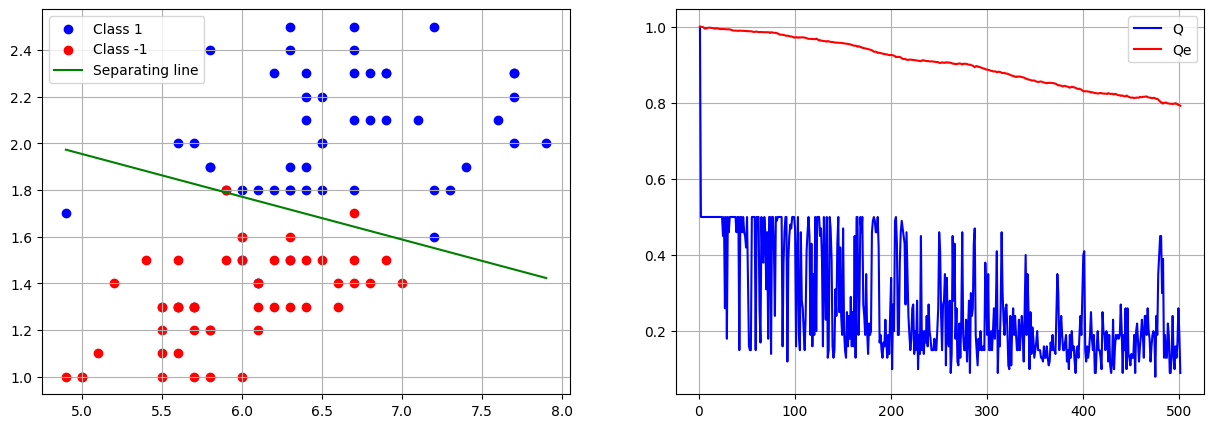

In [137]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].grid()
ax[1].grid()

x_0 = x_train[y_train == 1][:, 1:]
x_1 = x_train[y_train == -1][:, 1:]

x_min, x_max = np.min(x_train[:, 1]), np.max(x_train[:, 1])
x_range = np.linspace(x_min, x_max, 100)
y_range = -x_range * w[1] / w[2] - (w[0]+1.75) / w[2]

ax[0].scatter(x_0[:, 0], x_0[:, 1], color='blue', label='Class 1')
ax[0].scatter(x_1[:, 0], x_1[:, 1], color='red', label='Class -1')
ax[0].plot(x_range, y_range, color='green', label='Separating line')

ax[1].plot(range(1, 502), Q_lst, label='Q', c='blue')
ax[1].plot(range(1, 502), Qe_lst, label='Qe', c='red')

ax[0].legend()
ax[1].legend()
plt.show()